In [26]:
import sys
import os
import numpy as np
import matplotlib as mplt
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from matplotlib.animation import FFMpegFileWriter
import pandas as pd
sys.path.insert(0, '../../')

import magcolloids as mgc
#pint parameter
ureg = mgc.ureg

Necessary Extras

In [27]:
plt.rcParams['animation.ffmpeg_path'] = r'C:\\ffmpeg\\bin\\ffmpeg'
mplt.rcParams['agg.path.chunksize'] = 100000

def redefine_field(field,tilt_angle):
    field.fieldx = 'v_Bmag*(sin(v_freq*time*2*PI)*sin(v_theta)+cos(v_theta)*%s)'%np.sin(tilt_angle).magnitude
    field.fieldy = 'v_Bmag*(cos(v_freq*time*2*PI)*sin(v_theta))'%np.sin(tilt_angle).magnitude
    field.fieldz = 'v_Bmag*(cos(v_theta)*%s)'%np.cos(tilt_angle).magnitude
    return field

Trayectory Plotting

In [28]:
region, initial_conditions = mgc.initial_setup(9, packing = 0.3, height = 4, radius = 1.4)

particles = mgc.particles(
    initial_conditions*ureg.um,
    radius = 1.4*ureg.um,
    diffusion=0.07*ureg.um**2/ureg.s,
    density = 0*ureg.kg/ureg.m**3,
    temperature=300*ureg.K)

field = mgc.field(magnitude = 7.2*ureg.mT, frequency = 3.5*ureg.Hz, angle = 26.9*ureg.degrees)
#field = redefine_field(field,7*ureg.deg) #default 0

world = mgc.world(particles, temperature = 300*ureg.K,
                  region=region*ureg.um, boundaries = ['p','p','m'], walls = [False,False,False],
                  dipole_cutoff = 20*ureg.um)


In [32]:
n=3
sims = []
for i in range(n):
    sim = mgc.sim(dir_name = "C:\\Users\\emino\\OneDrive\\Desktop\\MagColloids\\Trayectories",
        timestep = 1e-3*ureg.s, framerate = 30*ureg.Hz, total_time = 60*ureg.s,
        particles = particles, world = world, field = field)
    sim.generate_scripts()
    sim.run()
    sim.load()
    trj = sim.lazy_read[::]
    sims.append(trj)

In [33]:
print(sims)
print(type(sims[0]))
print(type(trj))
#sims[0].to_csv('trayectories csv\\trj2.csv', index=True)

[          type        x         y          z
frame id                                    
0     1      1 -4.53046 -4.530460   0.000000
      2      1  0.00000 -4.530460   0.000000
      3      1  4.53046 -4.530460   0.000000
      4      1 -4.53046  0.000000   0.000000
      5      1  0.00000  0.000000   0.000000
      6      1  4.53046  0.000000   0.000000
      7      1 -4.53046  4.530460   0.000000
      8      1  0.00000  4.530460   0.000000
      9      1  4.53046  4.530460   0.000000
33    1      1 -6.21355 -6.041430  -7.800420
      2      1  2.71411 -3.025640   5.400040
      3      1  3.72505 -4.304460   1.765520
      4      1 -3.90620  0.169535  -2.027750
      5      1 -2.71564 -1.477130  -6.205440
      6      1  6.75947  1.233340   8.494900
      7      1 -6.69334  3.213300  -6.887000
      8      1  2.78744  5.617140   5.606860
      9      1  3.68361  4.600770   1.754640
66    1      1 -5.99173 -5.174890  -7.581200
      6      1  6.70130  1.126380   8.391960
      7  

Text(0, 0.5, 'x $\\mu{}m$')

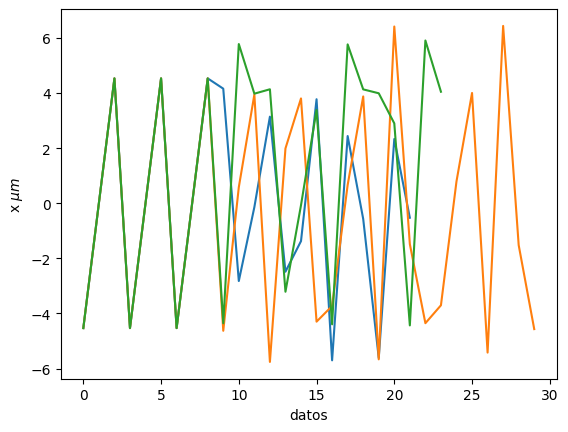

In [31]:
#print(type(trj.x))
#print(trj.y)
#print(trj.index.get_level_values('frame'))

#plt.plot(trj.index.get_level_values('frame'),trj.x)
#plt.xlabel("frame")
#plt.ylabel(r"x $\mu{}m$")

for i in range(n):
    #plt.plot(sims[i].index.get_level_values('frame'),sims[i].x)
    #print(len(sims[i].y.tolist()))
    s = sims[i].x.tolist()
    plt.plot(s)
plt.xlabel("datos")
plt.ylabel(r"x $\mu{}m$")